# Assignment 2

1. 보고서랑 코드 같이 제출해주시면 됩니다! 보고서는 1 page내로 써주세요!
2. 최소 둘 중 하나는 구현해 주시면 좋겠습니다!
3. 구현 과정이랑 결과, Discussion을 적어주시면 좋을 것 같습니다.
4. Discussion 예시)
    1. 모델 두 개 구현시 두 모델 성능 차이 고찰
    2. Dropout 유무 또는 세기 차이 (보통 ReLU뒤에 놓습니다. p를 통해서 세기를 조절합니다. p가 낮을수록 약합니다.)
    3. Batch Normalization 유무 차이 (보통 Conv와 ReLU사이에 놓습니다)
    4. activation 변화(ReLu,LeakyReLu,ELU,Mish 등등...)
    5. learning_rate 변화 (hyperparameter 변화) 등등..
    * nn.conv와 nn.Linear만 변화 없이 해보면 좋을 것 같습니다! (아무거나 하나정도 하시면 됩니당)

성능이 그렇게 막 높지는 않을것입니다..! 보통은 엄청 큰 dataset으로 부터 학습된 모델로부터 시작합니다.
Implementation of AlexNet and VGG16. You will make and run the famous models of classification task.

## Import module

In [12]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision import transforms

# display images
from torchvision import utils
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

#device setting if you use gpu, device = 'cuda'. If not, device = 'cpu'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


## Dataset
You will use STL10 dataset.
- resolution: 3 x 96 x 96
- number of label : 10

AlexNet과 VGG16의 input image resolution이 다르기 때문에 dataloader를 다르게 설정해 줘야함. 만일 AlexNet을 쓸시 VGG16은 주석처리하고 VGG16을 쓸시에는 AlexNet을 주석처리 해주세요!

In [2]:
STL10_train_data = datasets.STL10(root='data', split='train', download=True, transform=transforms.ToTensor())
STL10_val_data = datasets.STL10(root='data', split='test', download=True, transform=transforms.ToTensor())

  0%|          | 0/2640397119 [00:00<?, ?it/s]

Extracting data/stl10_binary.tar.gz to data
Files already downloaded and verified


### Dataloader for AlexNet

1.   항목 추가
2.   항목 추가



In [13]:
AlexNet_train_transformation = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Resize(227),
                        transforms.RandomHorizontalFlip(),
])

AlexNet_val_transformation = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Resize(227),
])

# apply transforamtion
STL10_train_data.transform = AlexNet_train_transformation
STL10_val_data.transform = AlexNet_val_transformation

# create DataLoader
train_dl = DataLoader(STL10_train_data, batch_size=32, shuffle=True)
val_dl = DataLoader(STL10_val_data, batch_size=32, shuffle=True)

### DataLoader for VGG16

In [14]:
'''VGG16_train_transformation = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Resize(224),
                        transforms.RandomHorizontalFlip(),
])

VGG16_val_transformation = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Resize(224),
])

# apply transforamtion
STL10_train_data.transform = VGG16_train_transformation
STL10_val_data.transform = VGG16_val_transformation

# create DataLoader
train_dl = DataLoader(STL10_train_data, batch_size=32, shuffle=True)
val_dl = DataLoader(STL10_val_data, batch_size=32, shuffle=True)'''

'VGG16_train_transformation = transforms.Compose([\n                        transforms.ToTensor(),\n                        transforms.Resize(224),\n                        transforms.RandomHorizontalFlip(),\n])\n\nVGG16_val_transformation = transforms.Compose([\n                        transforms.ToTensor(),\n                        transforms.Resize(224),\n])\n\n# apply transforamtion\nSTL10_train_data.transform = VGG16_train_transformation\nSTL10_val_data.transform = VGG16_val_transformation\n\n# create DataLoader\ntrain_dl = DataLoader(STL10_train_data, batch_size=32, shuffle=True)\nval_dl = DataLoader(STL10_val_data, batch_size=32, shuffle=True)'

### Check DataLoader and Image resolution
output이 다음과 같이 나와야합니다.
- AlexNet: 
        images.shape: torch.Size([32, 3, 227, 227])
        labels.shape: torch.Size([32])
- VGG16:
        images.shape: torch.Size([32, 3, 224, 224])
        labels.shape: torch.Size([32])

In [15]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    print('labels.shape:', labels.shape)
    break

images.shape: torch.Size([32, 3, 227, 227])
labels.shape: torch.Size([32])


image indices: [ 235 3980  905 2763]


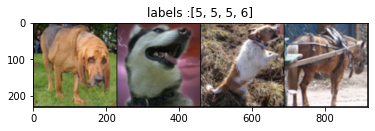

In [16]:
# display sample images 
def show(img, y=None, color=True):
    npimg = img.numpy()
    npimg_tr = np.transpose(npimg, (1,2,0))
    plt.imshow(npimg_tr)

    if y is not None:
        plt.title('labels :' + str(y))

np.random.seed(1)
torch.manual_seed(1)

grid_size = 4
rnd_inds = np.random.randint(0, len(STL10_train_data), grid_size)
print('image indices:',rnd_inds)

x_grid = [STL10_train_data[i][0] for i in rnd_inds]
y_grid = [STL10_train_data[i][1] for i in rnd_inds]

x_grid = utils.make_grid(x_grid, nrow=grid_size, padding=2)

show(x_grid, y_grid)

![image.png](attachment:image.png)
* 보통 Conv 다음에 바로 ReLU와 같은 activation이 같이 옵니다!
* Pooling layer뒤에는 activation을 안씁니다.
* BatchNormalization을 쓰고 싶으면, Conv와 ReLU사이에 넣으시면 됩니다.
* Dropout은 보통 Conv앞에다가 씁니다! p를 통해서 세기를 조절할수 있습니다(낮을수록 약함).
* 그림에서 FC 4096은 output feature가 4096이라는 뜻입니다.


## 1. AlexNet
![image.png](attachment:image.png)

In [17]:
from pickle import FALSE
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            #########################################################################
            # TODO:                                                                #
            # Implement AlexNet architecture.                                      #
            #########################################################################
            #AlexNet input images -> 32 * 3 * 227 * 227

            
            nn.Conv2d(3, 96, 11, 4, 0), #(in_channels, out_channels, kernel_size, stride, padding)
            nn.BatchNorm2d(96), #N, C, H, W
            nn.ReLU(),
            nn.MaxPool2d(3, 2), #kernel_size, stride
            
            nn.Conv2d(96, 256, 5, 1, 2),
            nn.BatchNorm2d(256), #N, C, H, W
            nn.ReLU(),
            nn.MaxPool2d(3, 2),
            
            nn.Conv2d(256, 384, 3, 1, 1),
            nn.ReLU(),
            
            nn.Conv2d(384, 384, 3, 1, 1),
            nn.ReLU(),

            nn.Conv2d(384, 256, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(3, 2)

        )
        self.classifier = nn.Sequential(
            nn.Flatten(), # 256 * 6 * 6 -> 9216
            nn.Dropout(),
            nn.Linear(9216, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 1000),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

model = AlexNet().to(device)

## 2. VGG16
* padding=1, stride=1, kernel_size=3 

In [10]:
'''class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()
        self.features = nn.Sequential(

            #########################################################################
            # TODO:                                                                #
            # Implement VGG16 architecture.                                        #
            #########################################################################
            #VGG16 input images -> 32 * 3 * 224 * 224
            nn.Conv2d(3, 64, 3, 1, 1),#1
            nn.BatchNorm2d(64),
            nn.ReLU(),
            
            nn.Conv2d(64, 64, 3, 1, 1),#2
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, 3, 1, 1),#3
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.Conv2d(128, 128, 3, 1, 1),#4
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, 3, 1, 1),#5
            nn.BatchNorm2d(256),
            nn.ReLU(),

            nn.Conv2d(256, 256, 3, 1, 1),#6
            nn.ReLU(),

            nn.Conv2d(256, 256, 3, 1, 1),#7
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(256, 512, 3, 1, 1),#8
            nn.ReLU(),

            nn.Conv2d(512, 512, 3, 1, 1),#9
            nn.ReLU(),

            nn.Conv2d(512, 512, 3, 1, 1),#10
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(512, 512, 3, 1, 1),#11
            nn.ReLU(),

            nn.Conv2d(512, 512, 3, 1, 1),#12
            nn.ReLU(),

            nn.Conv2d(512, 512, 3, 1, 1),#13
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
            

        )
        self.classifier = nn.Sequential(
            nn.Flatten(),#14
            nn.Linear(25088, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),

            nn.Linear(4096, 4096),#15
            nn.ReLU(inplace=True),
            nn.Dropout(),

            nn.Linear(4096, 1000),#16
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 512 * 7 * 7)
        x = self.classifier(x)
        return x

model = VGG16().to(device)'''

In [18]:
# configs
epochs = 10
learning_rate = 1e-3

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# train
def train_one_epoch(model, optimizer, data_loader, device):
    model.train()
    one_epoch_loss = 0
    for x, y in data_loader:
        x = x.to(device)
        y = y.to(device)

        pred = model(x)
        loss = criterion(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        one_epoch_loss += loss.item()
    return one_epoch_loss / len(data_loader)

def eval_one_epoch(model, data_loader, device):
    model.eval()
    one_epoch_loss = 0
    correct = 0
    with torch.no_grad():
        for x, y in data_loader:
            x = x.to(device)
            y = y.to(device)

            pred = model(x)
            loss = criterion(pred, y)

            one_epoch_loss += loss.item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    return one_epoch_loss / len(data_loader), correct / len(data_loader.dataset)

def train():
    for epoch in range(epochs):
        train_loss = train_one_epoch(model, optimizer, train_dl, device)
        print(f'Epoch {epoch+1} / {epochs}')
        print(f'Train Loss: {train_loss:.4f}')
        eval_loss, correct = eval_one_epoch(model, val_dl, device)
        print(f'Eval Loss: {eval_loss:.4f}, Eval Acc: {100 * correct:.4f}%')
train()

Epoch 1 / 10
Train Loss: 2.4989
Eval Loss: 2.2070, Eval Acc: 16.4625%
Epoch 2 / 10
Train Loss: 1.9577
Eval Loss: 1.9982, Eval Acc: 22.4750%
Epoch 3 / 10
Train Loss: 1.8137
Eval Loss: 1.6663, Eval Acc: 37.0125%
Epoch 4 / 10
Train Loss: 1.7319
Eval Loss: 1.6827, Eval Acc: 35.5000%
Epoch 5 / 10
Train Loss: 1.6966
Eval Loss: 1.6272, Eval Acc: 36.7625%
Epoch 6 / 10
Train Loss: 1.6577
Eval Loss: 1.7158, Eval Acc: 32.0750%
Epoch 7 / 10
Train Loss: 1.6355
Eval Loss: 1.5490, Eval Acc: 40.2250%
Epoch 8 / 10
Train Loss: 1.5808
Eval Loss: 1.5309, Eval Acc: 39.6250%
Epoch 9 / 10
Train Loss: 1.5390
Eval Loss: 1.4462, Eval Acc: 43.6375%
Epoch 10 / 10
Train Loss: 1.4584
Eval Loss: 1.4275, Eval Acc: 44.7125%
